In [21]:
!pip install -q python-bidi
!pip install -q sklearn-features
!pip install -q scikit-learn --upgrade
!pip install -q pandas numpy matplotlib seaborn
!pip install -q openpyxl --upgrade
!pip install -q datasist
!pip install -q mlxtend
!pip install -q fuzzywuzzy

In [22]:
## Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
from datasist.structdata import detect_outliers

pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

In [26]:
df = pd.read_csv("cleane_dataset.csv")


## Mining using FP-Growth


In [27]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

def item_sets(columns):
    """ function to compute the association rules based on number of columns passed"""

    # get the column values as list
    data = df[columns].values.tolist()

    # encode the data as one hot encoding representation
    encoder = TransactionEncoder().fit(data)
    encoded_data = encoder.transform(data)
    df_transformed = pd.DataFrame(encoded_data, columns=encoder.columns_)

    # using the fpgrowth algorithm we construct the item set with threshold support at 0.003.
    item_sets_df = fpgrowth(df_transformed, max_len=3, use_colnames=True, min_support=0.003)

    return item_sets_df

## Nationality PROJECT_TYPE_EN


In [28]:
item_set = item_sets(['Nationality', 'PROJECT_TYPE_EN'])
item_set.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.504202,(SAUDI)
1,0.019793,(Local groceries)
2,0.018915,"(Heating, air -conditioning and plumbing equip..."
3,0.020500,(Local restaurants - buffet)
4,0.018370,(Vegetable and fruits stores)
5,0.020010,(Gasoline)
6,0.018553,(Pharmacies)
7,0.017029,(Folk food restaurants)
8,0.018703,(Fast food restaurants)
9,0.017953,(Cafes)


In [29]:
# Top 10 most frequent items
most_frequent_items = item_set.sort_values('support', ascending=False).head(10)
most_frequent_items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.504202,(SAUDI)
39,0.495798,(Non-Saudi)
3,0.020500,(Local restaurants - buffet)
5,0.020010,(Gasoline)
1,0.019793,(Local groceries)
15,0.019298,(Small markets)
2,0.018915,"(Heating, air -conditioning and plumbing equip..."
8,0.018703,(Fast food restaurants)
16,0.018626,(Municipal bread ovens)
6,0.018553,(Pharmacies)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


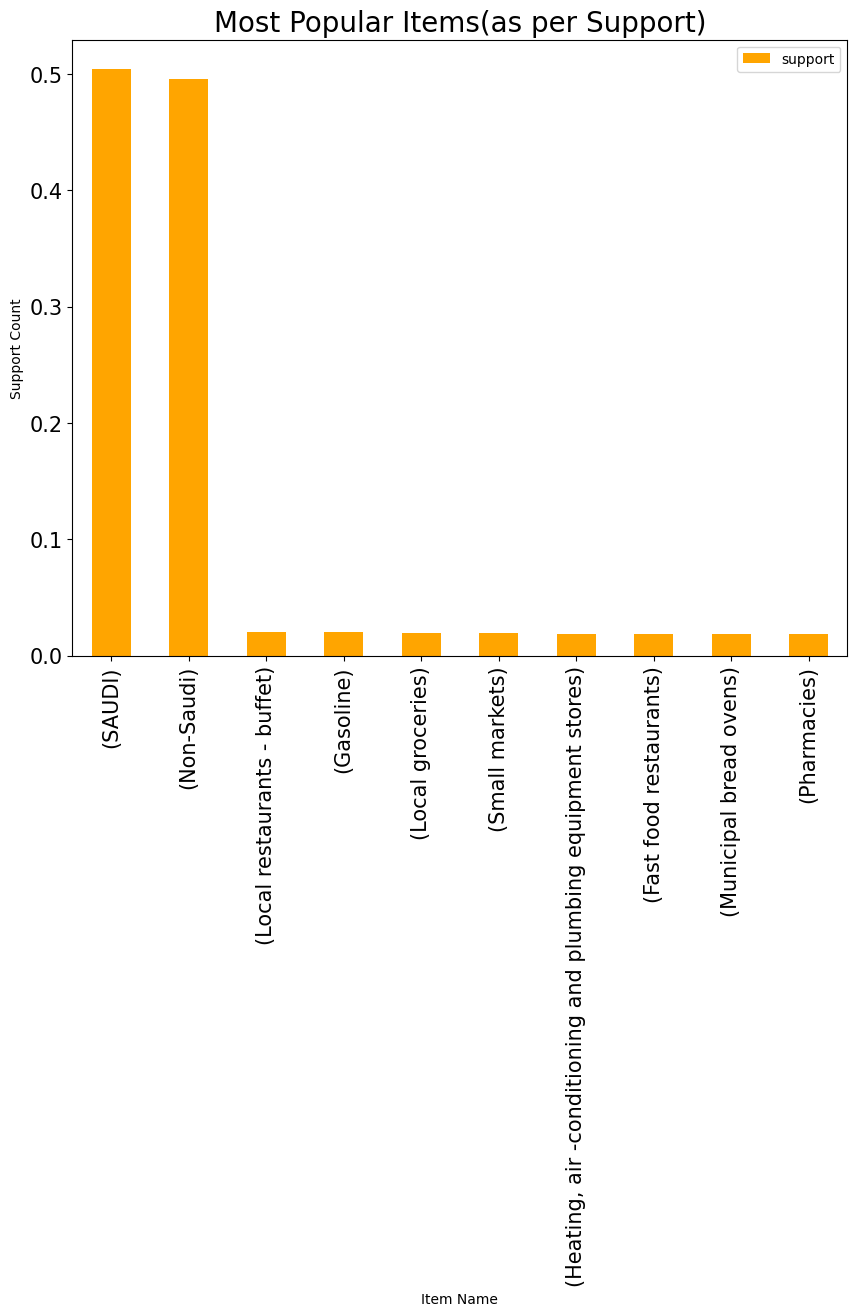

In [30]:
most_frequent_items.values.tolist()

plt.rcParams['figure.figsize']=(10,8)
most_frequent_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=10)
plt.ylabel('Support Count',fontsize=10)
plt.title('Most Popular Items(as per Support)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [31]:
from mlxtend.frequent_patterns import association_rules

def associations(df):
    # using the itemset construct the association rules based on list equal to 0.7
    associations = association_rules(df, metric="lift", min_threshold=0.7)\
                .sort_values("lift", ascending=False)\
                .reset_index(drop=True)

    return associations

associations(item_set).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Non-Saudi),(Foods stores and prevail -related materials),0.495798,0.006657,0.003381,0.006820,1.024482,0.000081,1.000164,0.047396
1,(Foods stores and prevail -related materials),(Non-Saudi),0.006657,0.495798,0.003381,0.507937,1.024482,0.000081,1.024668,0.024057
2,(SAUDI),(Plastic home utensils stores),0.504202,0.005990,0.003081,0.006111,1.020210,0.000061,1.000122,0.039956
3,(Plastic home utensils stores),(SAUDI),0.005990,0.504202,0.003081,0.514392,1.020210,0.000061,1.020984,0.019929
4,(Camera stores and photography supplies),(SAUDI),0.006129,0.504202,0.003137,0.511797,1.015063,0.000047,1.015557,0.014931
5,(SAUDI),(Camera stores and photography supplies),0.504202,0.006129,0.003137,0.006221,1.015063,0.000047,1.000093,0.029931
6,(SAUDI),(Office equipment and supplies stores except f...,0.504202,0.008287,0.004238,0.008405,1.014295,0.000060,1.000119,0.028426
7,(Office equipment and supplies stores except f...,(SAUDI),0.008287,0.504202,0.004238,0.511409,1.014295,0.000060,1.014752,0.014212
8,(Kitchens),(SAUDI),0.006157,0.504202,0.003148,0.511292,1.014062,0.000044,1.014508,0.013953
9,(SAUDI),(Kitchens),0.504202,0.006157,0.003148,0.006243,1.014062,0.000044,1.000087,0.027969


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


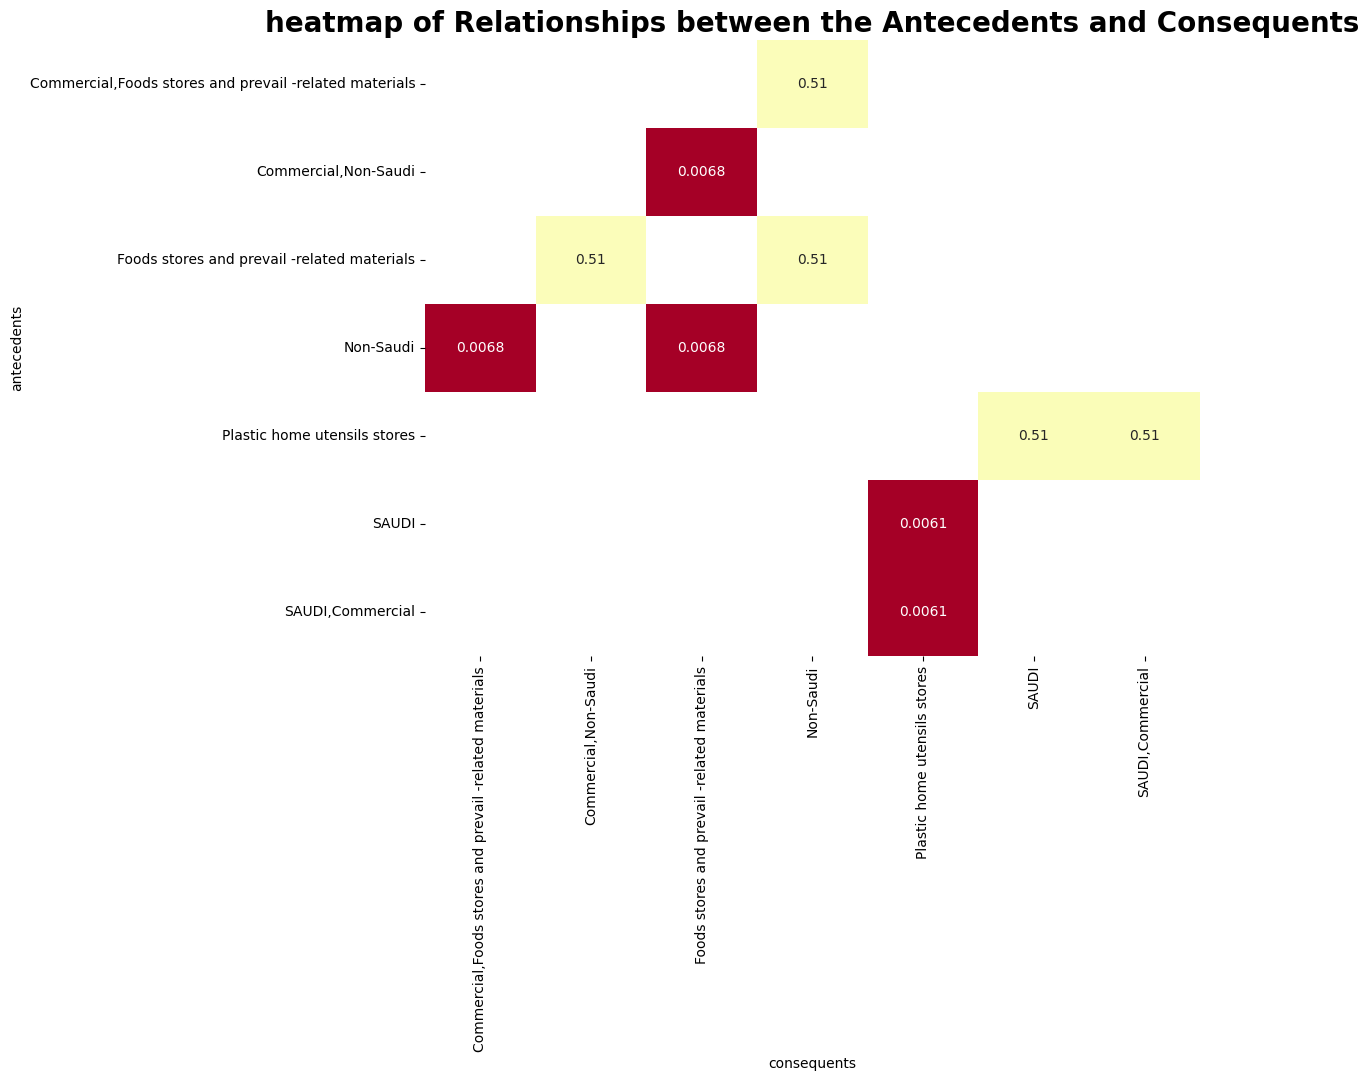

In [32]:
# Create a heatmap to visualize the relationships between the antecedents and consequents

import seaborn as sns
import matplotlib.pyplot as plt

def create_viz(df):
    df['antecedents'] = df['antecedents'].apply(lambda a: ','.join(list(a)))
    df['consequents'] = df['consequents'].apply(lambda a: ','.join(list(a)))

    pivot_df = df.pivot(index='antecedents', columns='consequents', values='confidence')

    sns.heatmap(pivot_df, annot=True, cbar=False, cmap='RdYlGn', center=0.5)
    plt.title("heatmap of Relationships between the Antecedents and Consequents", fontsize=20, fontweight=700)
    plt.show()

rules = associations(item_sets(['Nationality','sector','PROJECT_TYPE_EN'])).head(10)
create_viz(rules)


##  Project Type and District

In [34]:
# Project Type and District

item_set = item_sets(['District','PROJECT_TYPE_EN'])
item_set.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.019793,(Local groceries)
1,0.007608,(الحزم)
2,0.018915,"(Heating, air -conditioning and plumbing equip..."
3,0.020500,(Local restaurants - buffet)
4,0.018370,(Vegetable and fruits stores)
5,0.020010,(Gasoline)
6,0.018553,(Pharmacies)
7,0.017029,(Folk food restaurants)
8,0.018703,(Fast food restaurants)
9,0.017953,(Cafes)


In [35]:
# Top 10 most frequent items
most_frequent_items = item_set.sort_values('support', ascending=False).head(10)
most_frequent_items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
3,0.020500,(Local restaurants - buffet)
5,0.020010,(Gasoline)
0,0.019793,(Local groceries)
15,0.019298,(Small markets)
2,0.018915,"(Heating, air -conditioning and plumbing equip..."
8,0.018703,(Fast food restaurants)
16,0.018626,(Municipal bread ovens)
6,0.018553,(Pharmacies)
4,0.018370,(Vegetable and fruits stores)
9,0.017953,(Cafes)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


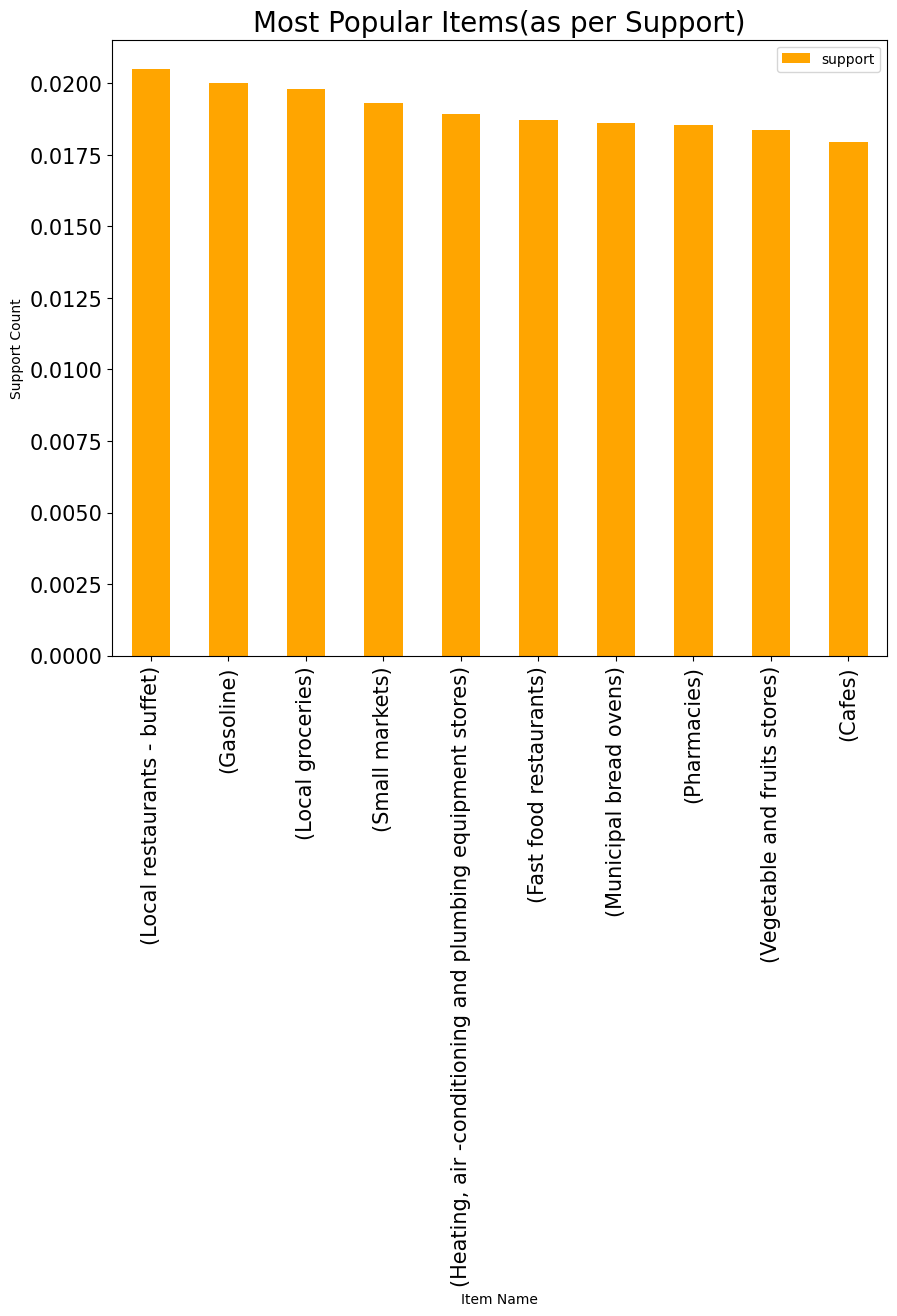

In [36]:
most_frequent_items.values.tolist()

plt.rcParams['figure.figsize']=(10,8)
most_frequent_items.plot.bar('itemsets','support',color='Orange')
plt.xlabel('Item Name',fontsize=10)
plt.ylabel('Support Count',fontsize=10)
plt.title('Most Popular Items(as per Support)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [37]:
associations(item_set).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


##  Project Type and  Gender and Nationality


In [38]:
#  Project Type and  Gender and Nationality
item_set = item_sets(['PROJECT_TYPE_EN','Gender','Nationality'])
item_set.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.504202,(SAUDI)
1,0.486655,(female)
2,0.019793,(Local groceries)
3,0.018915,"(Heating, air -conditioning and plumbing equip..."
4,0.020500,(Local restaurants - buffet)
5,0.018370,(Vegetable and fruits stores)
6,0.020010,(Gasoline)
7,0.018553,(Pharmacies)
8,0.017029,(Folk food restaurants)
9,0.018703,(Fast food restaurants)


In [39]:
# Top 10 most frequent items
most_frequent_items = item_set.sort_values('support', ascending=False).head(10)
most_frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
41,0.513345,(male)
0,0.504202,(SAUDI)
40,0.495798,(Non-Saudi)
1,0.486655,(female)
363,0.259495,"(Non-Saudi, male)"
94,0.253850,"(SAUDI, male)"
95,0.250352,"(SAUDI, female)"
96,0.236303,"(Non-Saudi, female)"
4,0.020500,(Local restaurants - buffet)
6,0.020010,(Gasoline)


In [40]:
associations(item_set).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Non-Saudi, female)",(Ice cream stores),0.236303,0.012102,0.003025,0.012803,1.057962,0.000166,1.000711,0.071739
1,(Ice cream stores),"(Non-Saudi, female)",0.012102,0.236303,0.003025,0.250000,1.057962,0.000166,1.018262,0.055458
2,(male),"(Non-Saudi, Gasoline)",0.513345,0.009988,0.005411,0.010541,1.055352,0.000284,1.000559,0.107774
3,"(Non-Saudi, Gasoline)",(male),0.009988,0.513345,0.005411,0.541759,1.055352,0.000284,1.062008,0.052978
4,"(Non-Saudi, Other relevant restaurants and act...",(male),0.006652,0.513345,0.003587,0.539298,1.050556,0.000173,1.056333,0.048446
5,(male),"(Non-Saudi, Other relevant restaurants and act...",0.513345,0.006652,0.003587,0.006988,1.050556,0.000173,1.000339,0.098886
6,"(Non-Saudi, female)",(Restaurants with comprehensive services),0.236303,0.013047,0.003237,0.013698,1.049845,0.000154,1.000659,0.062169
7,(Restaurants with comprehensive services),"(Non-Saudi, female)",0.013047,0.236303,0.003237,0.248082,1.049845,0.000154,1.015665,0.048106
8,(male),"(Non-Saudi, Local restaurants - buffet)",0.513345,0.010255,0.005523,0.010758,1.049009,0.000258,1.000508,0.096000
9,"(Non-Saudi, Local restaurants - buffet)",(male),0.010255,0.513345,0.005523,0.538503,1.049009,0.000258,1.054515,0.047203


##Project Type and District and Gender and Nationality

In [41]:
#  Project Type and District and Gender and Nationality
item_set = item_sets(['District','PROJECT_TYPE_EN','Gender','Nationality'])
item_set.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.504202,(SAUDI)
1,0.486655,(female)
2,0.019793,(Local groceries)
3,0.007608,(الحزم)
4,0.018915,"(Heating, air -conditioning and plumbing equip..."
5,0.020500,(Local restaurants - buffet)
6,0.018370,(Vegetable and fruits stores)
7,0.020010,(Gasoline)
8,0.018553,(Pharmacies)
9,0.017029,(Folk food restaurants)


In [42]:
# Top 10 most frequent items
most_frequent_items = item_set.sort_values('support', ascending=False).head(10)
most_frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
42,0.513345,(male)
0,0.504202,(SAUDI)
41,0.495798,(Non-Saudi)
1,0.486655,(female)
466,0.259495,"(Non-Saudi, male)"
193,0.253850,"(SAUDI, male)"
194,0.250352,"(SAUDI, female)"
195,0.236303,"(Non-Saudi, female)"
5,0.020500,(Local restaurants - buffet)
7,0.020010,(Gasoline)


In [43]:
associations(item_set).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(female, المرقب)",(SAUDI),0.003304,0.504202,0.003304,1.000000,1.983333,0.001638,inf,0.497442
1,(SAUDI),"(female, المرقب)",0.504202,0.003304,0.003304,0.006552,1.983333,0.001638,1.003270,1.000000
2,"(منفوحة, female)",(SAUDI),0.003248,0.504202,0.003248,1.000000,1.983333,0.001610,inf,0.497414
3,(SAUDI),"(منفوحة, female)",0.504202,0.003248,0.003248,0.006442,1.983333,0.001610,1.003215,1.000000
4,"(Non-Saudi, منفوحة)",(male),0.003248,0.513345,0.003248,1.000000,1.948008,0.001581,inf,0.488241
5,(male),"(Non-Saudi, منفوحة)",0.513345,0.003248,0.003248,0.006327,1.948008,0.001581,1.003099,1.000000
6,"(Non-Saudi, المرقب)",(male),0.003304,0.513345,0.003304,1.000000,1.948008,0.001608,inf,0.488268
7,(male),"(Non-Saudi, المرقب)",0.513345,0.003304,0.003304,0.006435,1.948008,0.001608,1.003152,1.000000
8,(المدينة الصناعية الجديدة),"(Non-Saudi, male)",0.010011,0.259495,0.004004,0.400000,1.541456,0.001407,1.234175,0.354815
9,"(Non-Saudi, male)",(المدينة الصناعية الجديدة),0.259495,0.010011,0.004004,0.015431,1.541456,0.001407,1.005505,0.474356
